# Reinforcement Learning

This is some code replicated from http://outlace.com/Reinforcement-Learning-Part-1/ for understanding how reinforcement learning works. Please read the above link for details. 

The problem explained in the code is of playing the n-armed bandits (n slot machines) in a casino in order to maximize ones rewards. Maximum payoff is \$10 and each armed bandit has a varing probability of payoff. 

In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

E:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# For replication
np.random.seed(1337)

In [3]:
n = 10
bandit_payoff_probs = np.random.rand(n)
print bandit_payoff_probs
print "Bandit with best payoff: %s" % np.argmax(bandit_payoff_probs)

[ 0.26202468  0.15868397  0.27812652  0.45931689  0.32100054  0.51839282
  0.26194293  0.97608528  0.73281455  0.11527423]
Bandit with best payoff: 7


In [4]:
def rewards(p, max_cost=5):
    # Return the total reward equal to the times random number < p
    return np.sum(np.random.rand(max_cost) < p)
    
rewards(0.3)

1

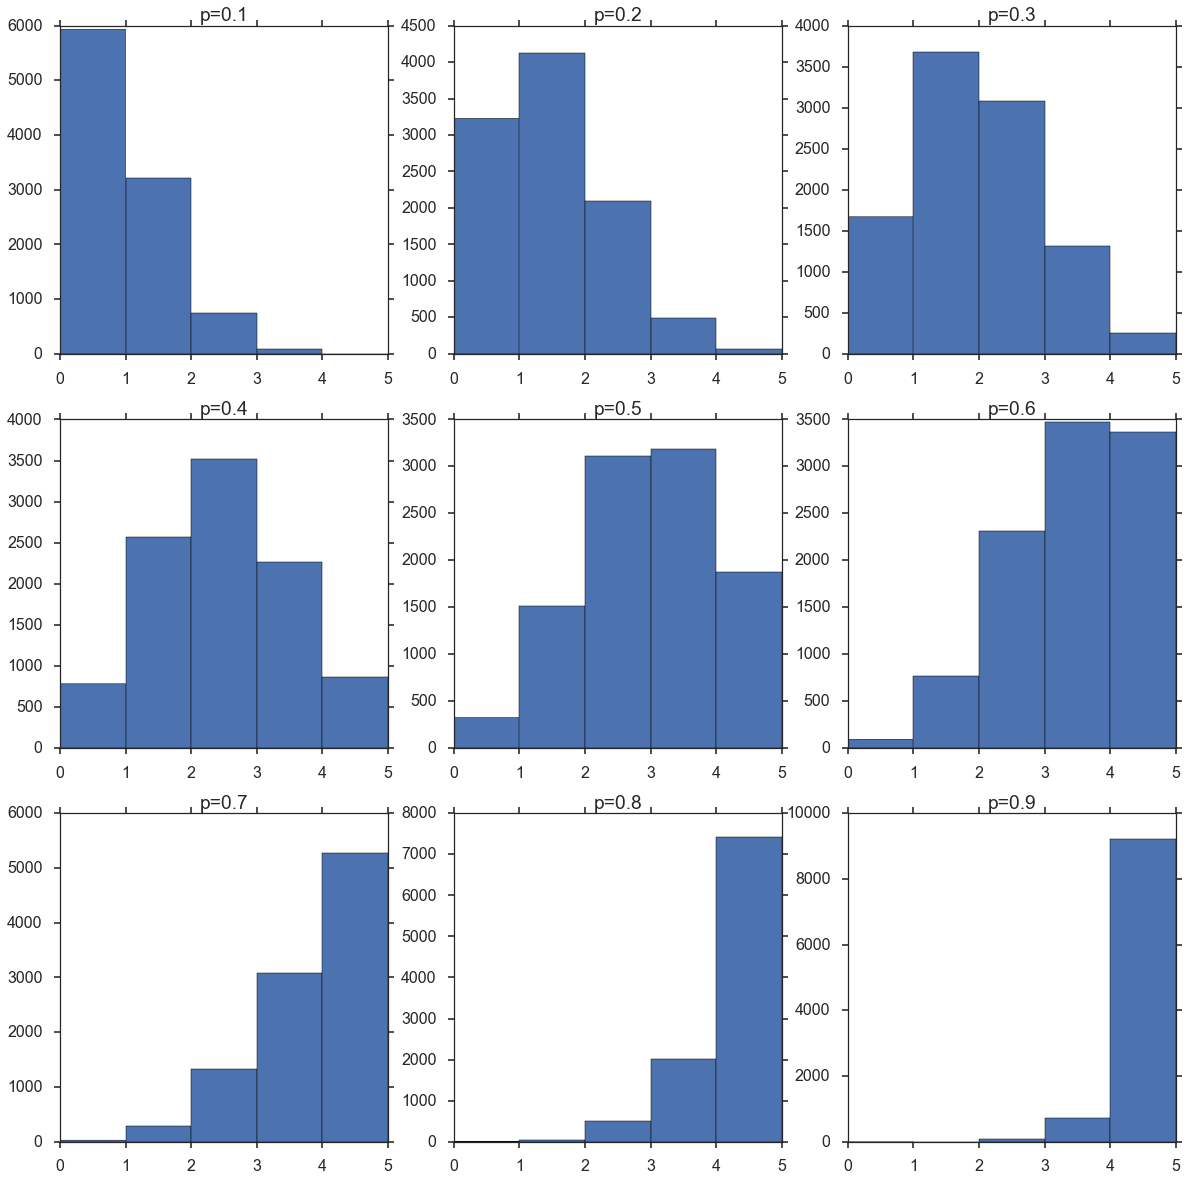

In [5]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

for i, (axi, p) in enumerate(zip(ax.flatten(), [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])):
    axi.hist([rewards(p) for k in xrange(10000)], bins=range(6))
    axi.set_title("p=%s" % p)

In [6]:
def best_arm(mean_rewards):
    return np.argmax(mean_rewards)
    
best_arm([0.1,0.5, 0.3])

1

[ 0.26202468  0.15868397  0.27812652  0.45931689  0.32100054  0.51839282
  0.26194293  0.97608528  0.73281455  0.11527423]


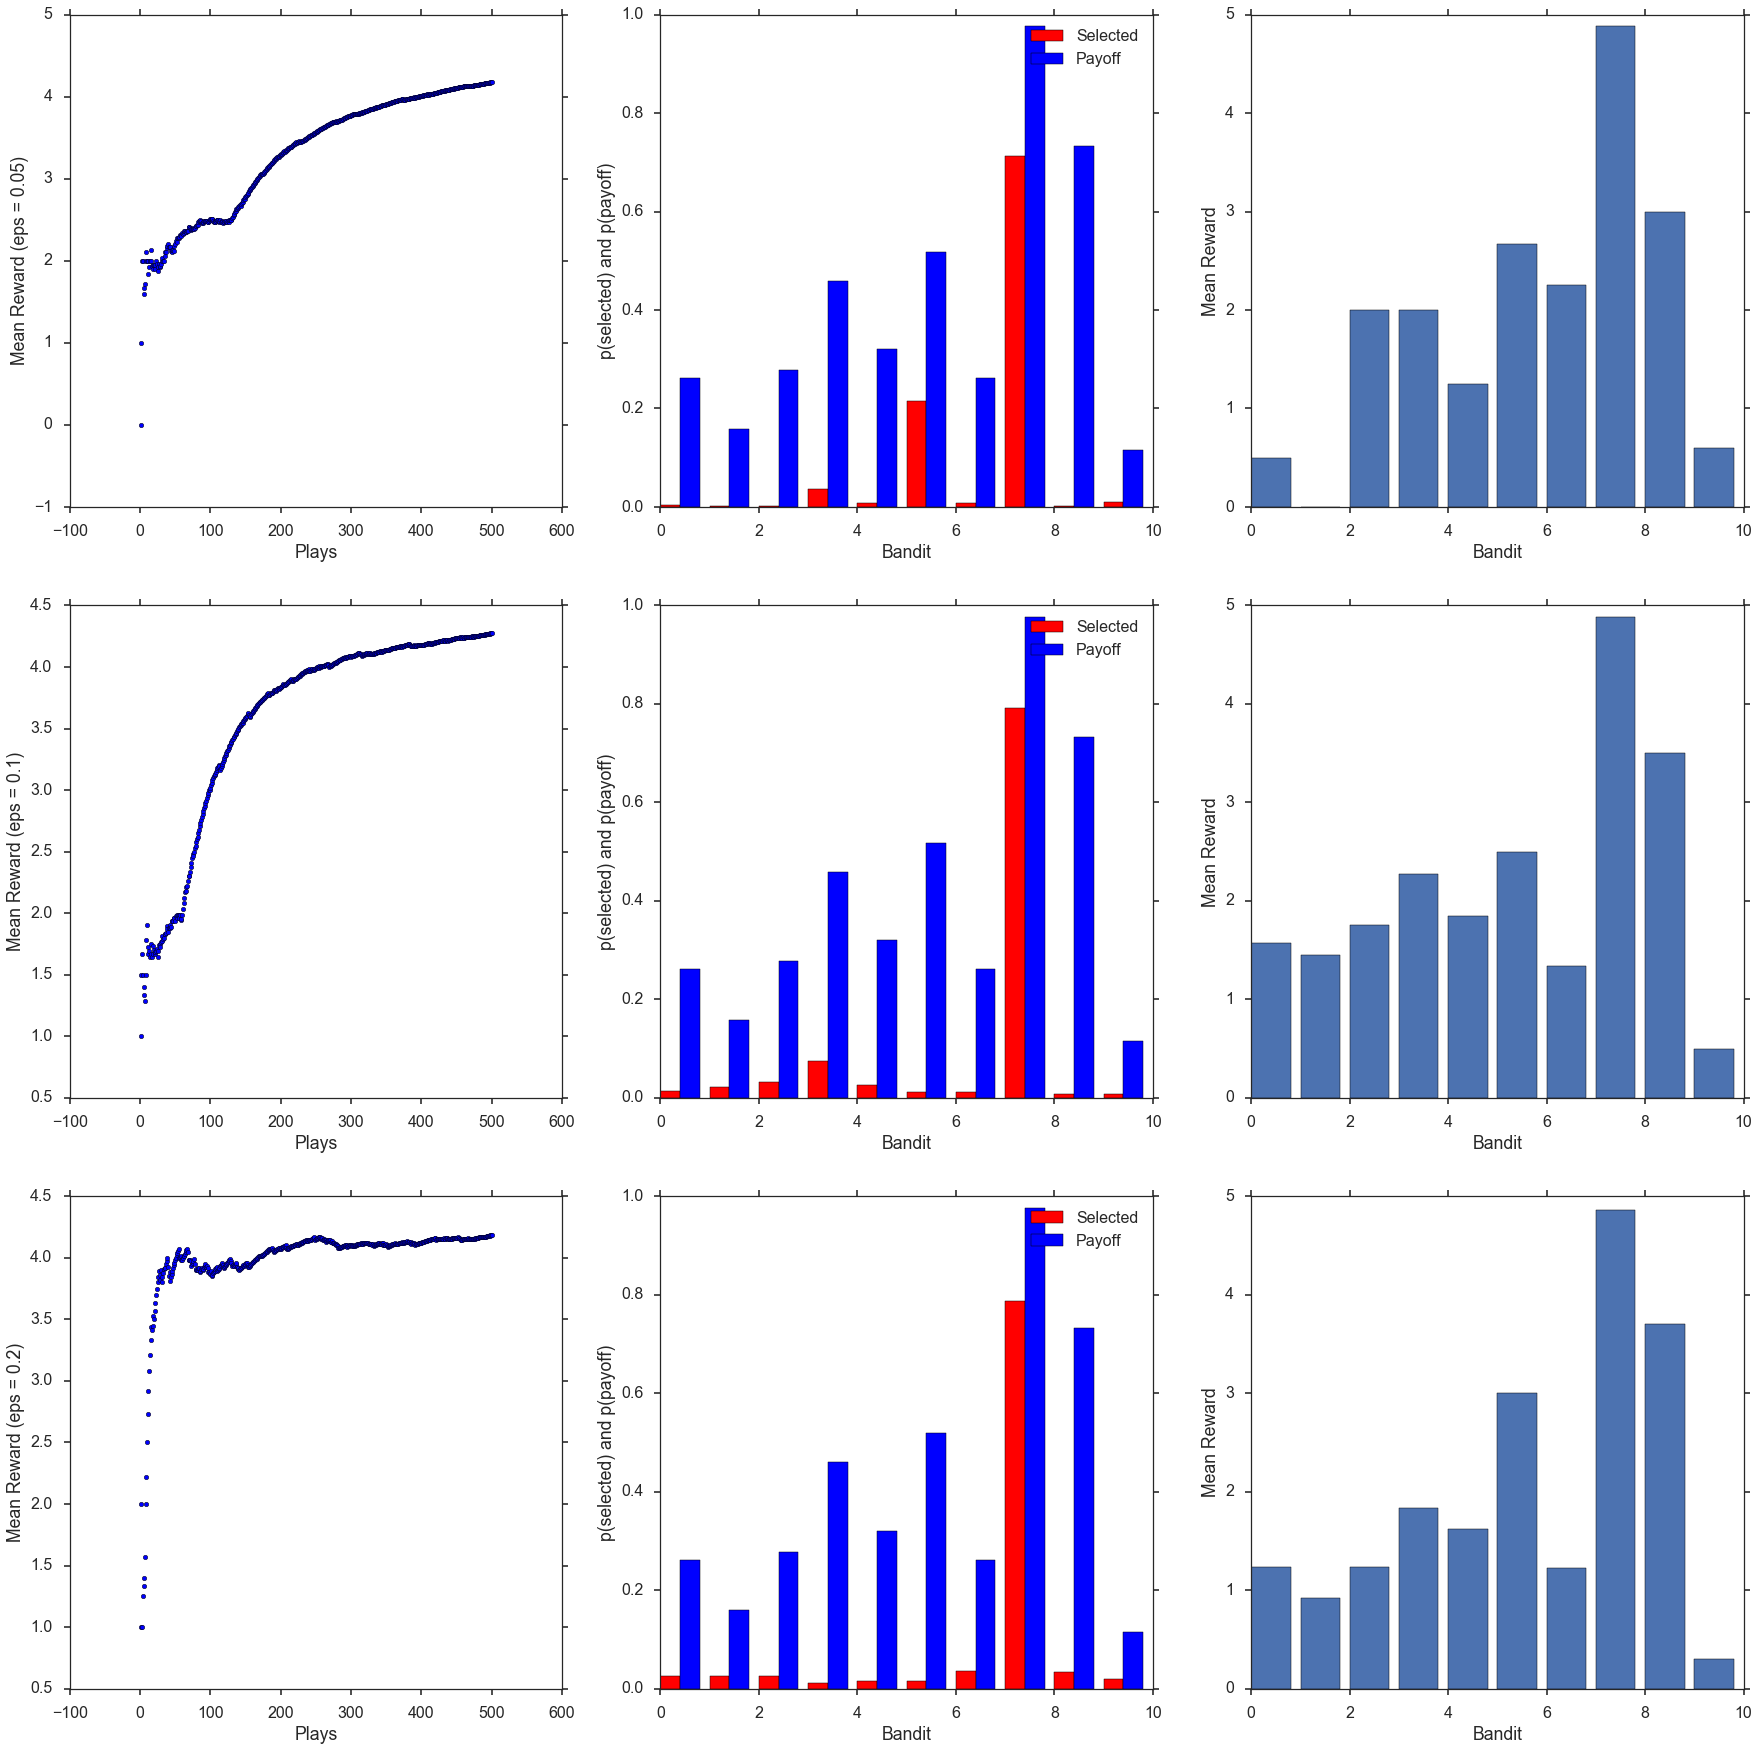

In [7]:
eps = 0.05 # epsilon for randomly using a bandit
num_plays = 500
running_mean_reward = 0
mean_rewards = np.zeros(n)
count_arms = np.zeros(n)
print bandit_payoff_probs

plt.clf()
fig, ax = plt.subplots(3,3, figsize=(30,30))
for i, eps in enumerate([0.05, 0.1, 0.2]):
    mean_rewards = np.zeros(n)
    count_arms = np.zeros(n)
    ax[i,0].set_xlabel("Plays")
    ax[i,0].set_ylabel("Mean Reward (eps = %s)" % eps)
    for j in xrange(1,num_plays+1):
        if np.random.rand() > eps:
            choice = best_arm(mean_rewards)
        else:
            choice = np.random.randint(n)
        curr_reward = rewards(bandit_payoff_probs[choice])
        count_arms[choice] += 1
        mean_rewards[choice] += (curr_reward - mean_rewards[choice]) * 1. / count_arms[choice]
        running_mean_reward += (curr_reward - running_mean_reward) * 1. / j
        ax[i,0].scatter(j,running_mean_reward)

    width = 0.4
    ax[i,1].bar(np.arange(n), count_arms * 1. / num_plays, width, color="r", label="Selected")
    ax[i,1].bar(np.arange(n) + width, bandit_payoff_probs, width, color="b", label="Payoff")
    ax[i,1].set_xlabel("Bandit")
    ax[i,1].set_ylabel("p(selected) and p(payoff)")
    ax[i,1].legend(loc="upper right")
    ax[i,2].bar(np.arange(n), mean_rewards)
    ax[i,2].set_xlabel("Bandit")
    ax[i,2].set_ylabel("Mean Reward")



## Using softmax function for random selection of arms

In [8]:
def best_arm(mean_rewards, tau=1.0):
    exp_r = np.exp(mean_rewards/tau)
    exp_r = exp_r / exp_r.sum()
    return np.random.choice(range(n), p=exp_r, size=1)[0]

[best_arm(mean_rewards) for k in xrange(10)]

[7, 8, 5, 7, 7, 3, 7, 8, 7, 7]

(array([ 55.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,  35.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

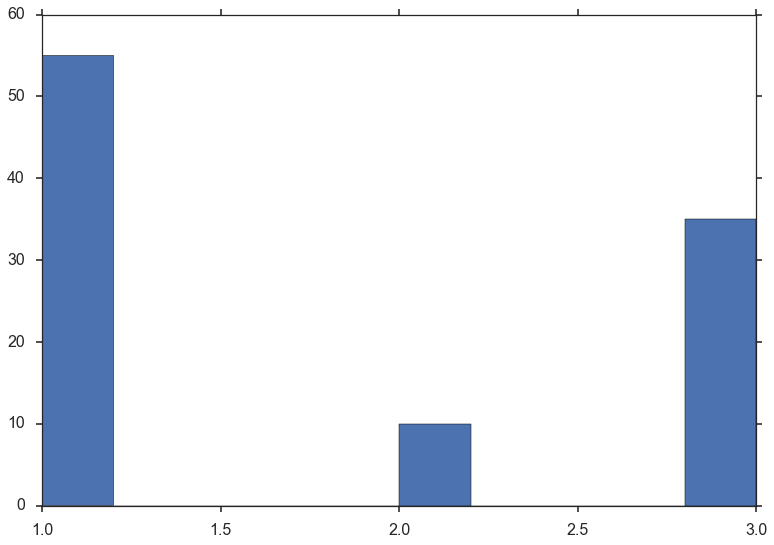

In [9]:
plt.hist(np.random.choice([1,2,3], p=[0.5,0.1,0.4], size=100))

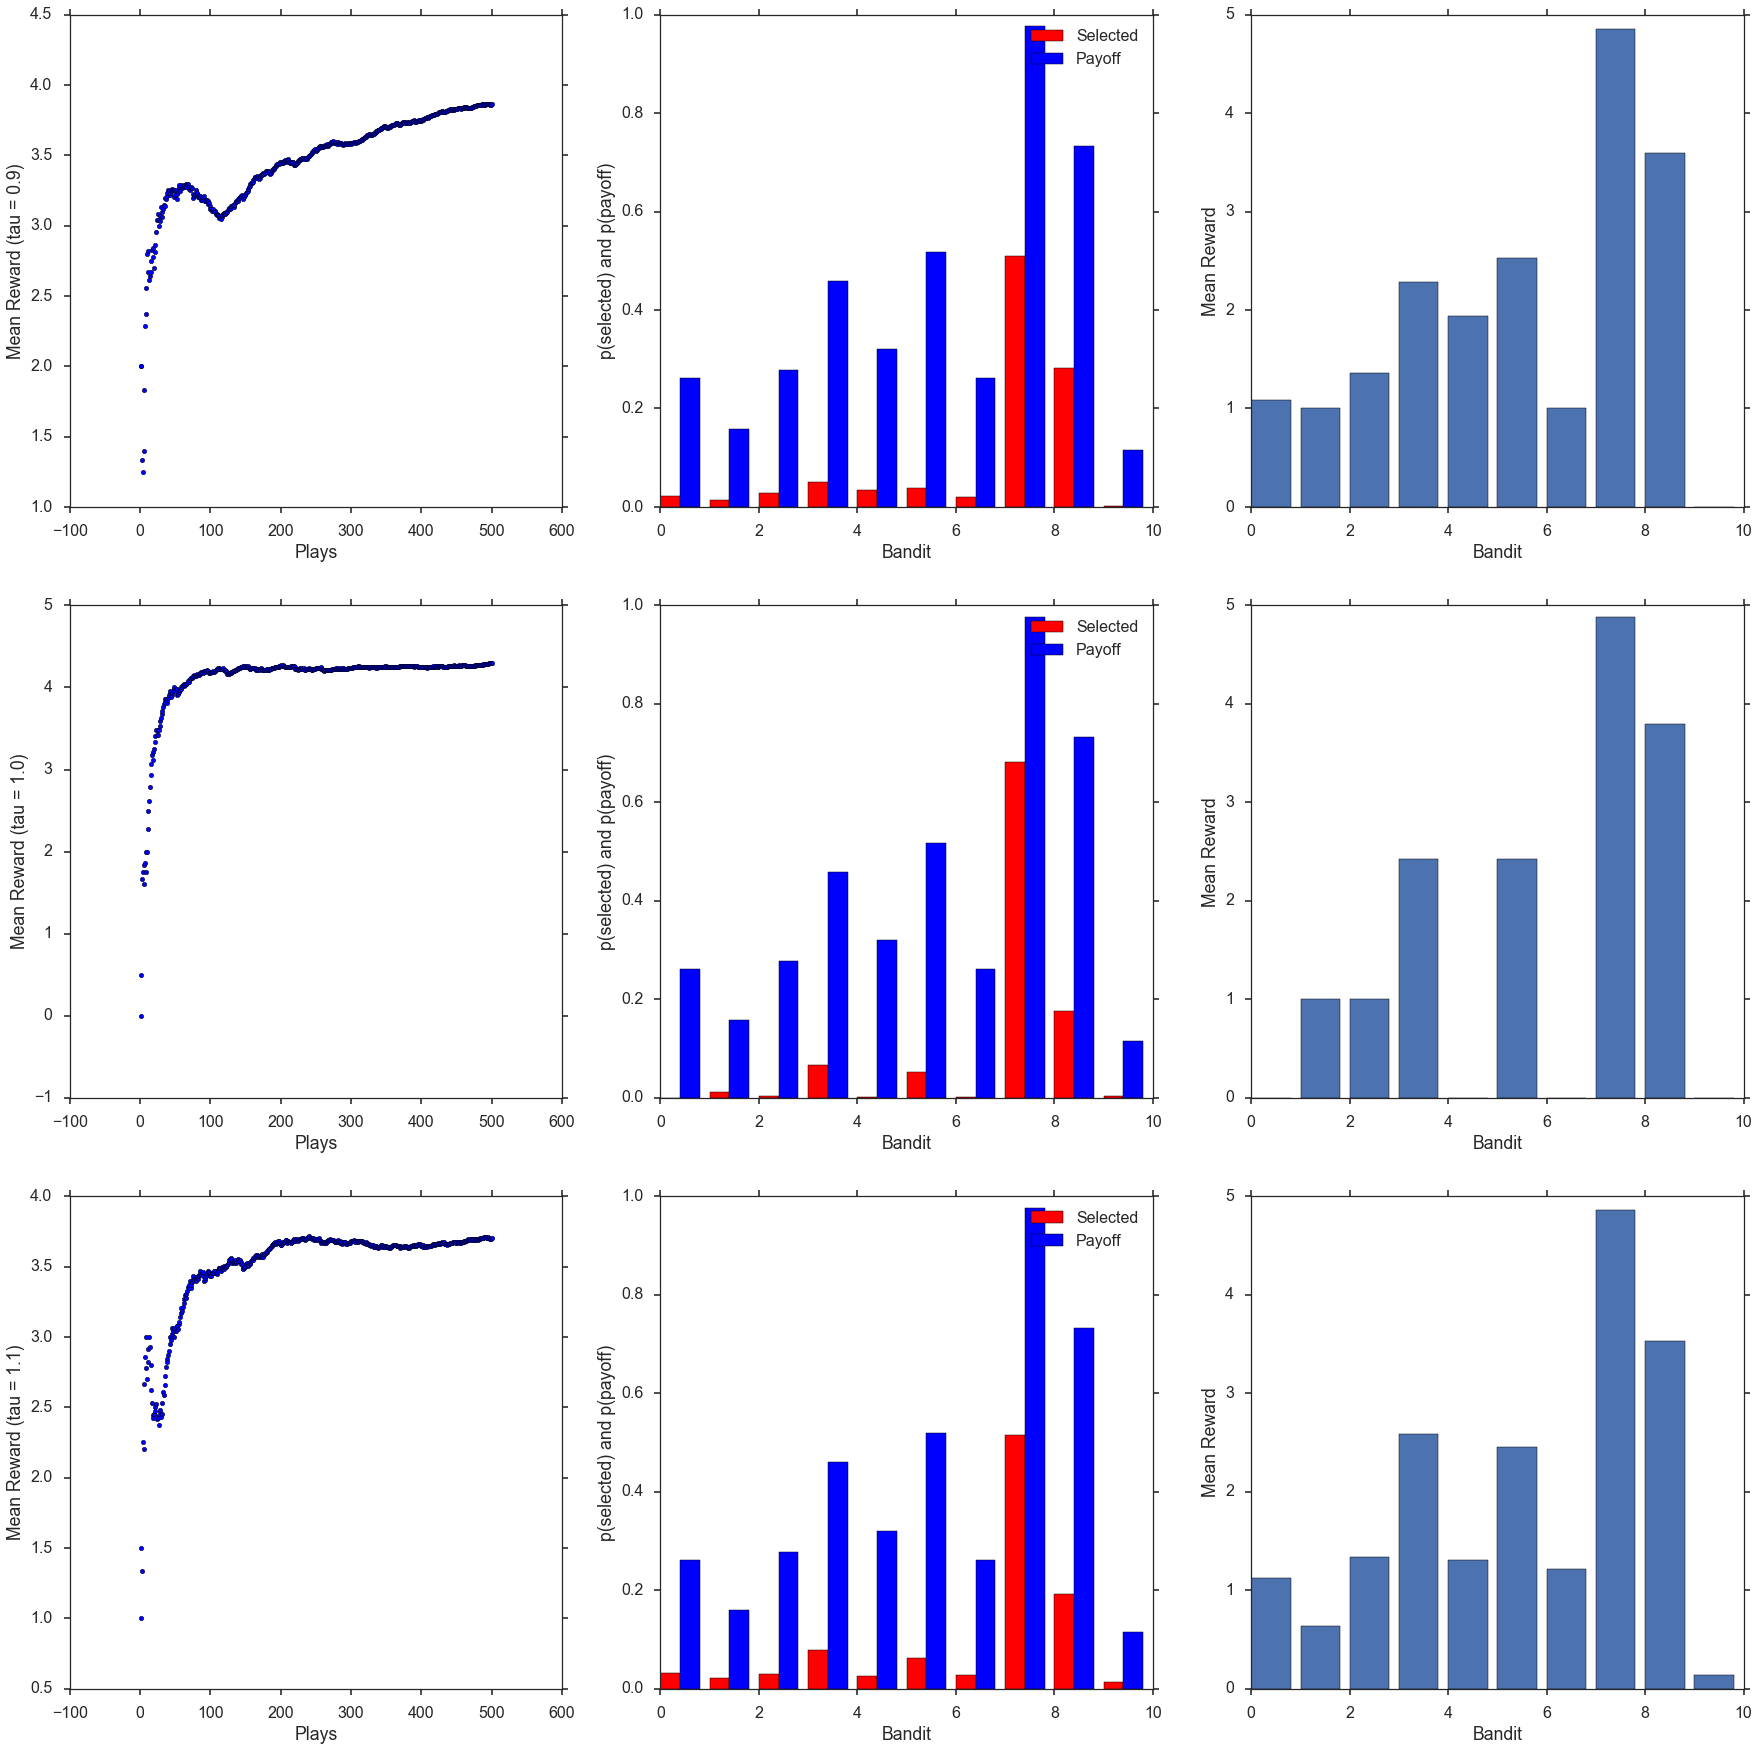

In [10]:
num_plays = 500
running_mean_reward = 0

plt.clf()
fig, ax = plt.subplots(3,3, figsize=(30,30))
for i, tau in enumerate([0.9, 1., 1.1]):
    mean_rewards = np.zeros(n)
    count_arms = np.zeros(n)
    ax[i,0].set_xlabel("Plays")
    ax[i,0].set_ylabel("Mean Reward (tau = %s)" % tau)
    for j in xrange(1,num_plays+1):
        choice = best_arm(mean_rewards, tau=tau)
        curr_reward = rewards(bandit_payoff_probs[choice])
        count_arms[choice] += 1
        mean_rewards[choice] += (curr_reward - mean_rewards[choice]) * 1. / count_arms[choice]
        running_mean_reward += (curr_reward - running_mean_reward) * 1. / j
        ax[i,0].scatter(j,running_mean_reward)

    width = 0.4
    ax[i,1].bar(np.arange(n), count_arms * 1. / num_plays, width, color="r", label="Selected")
    ax[i,1].bar(np.arange(n) + width, bandit_payoff_probs, width, color="b", label="Payoff")
    ax[i,1].set_xlabel("Bandit")
    ax[i,1].set_ylabel("p(selected) and p(payoff)")
    ax[i,1].legend(loc="upper right")
    ax[i,2].bar(np.arange(n), mean_rewards)
    ax[i,2].set_xlabel("Bandit")
    ax[i,2].set_ylabel("Mean Reward")

